In [59]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [60]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

<IPython.core.display.Javascript object>


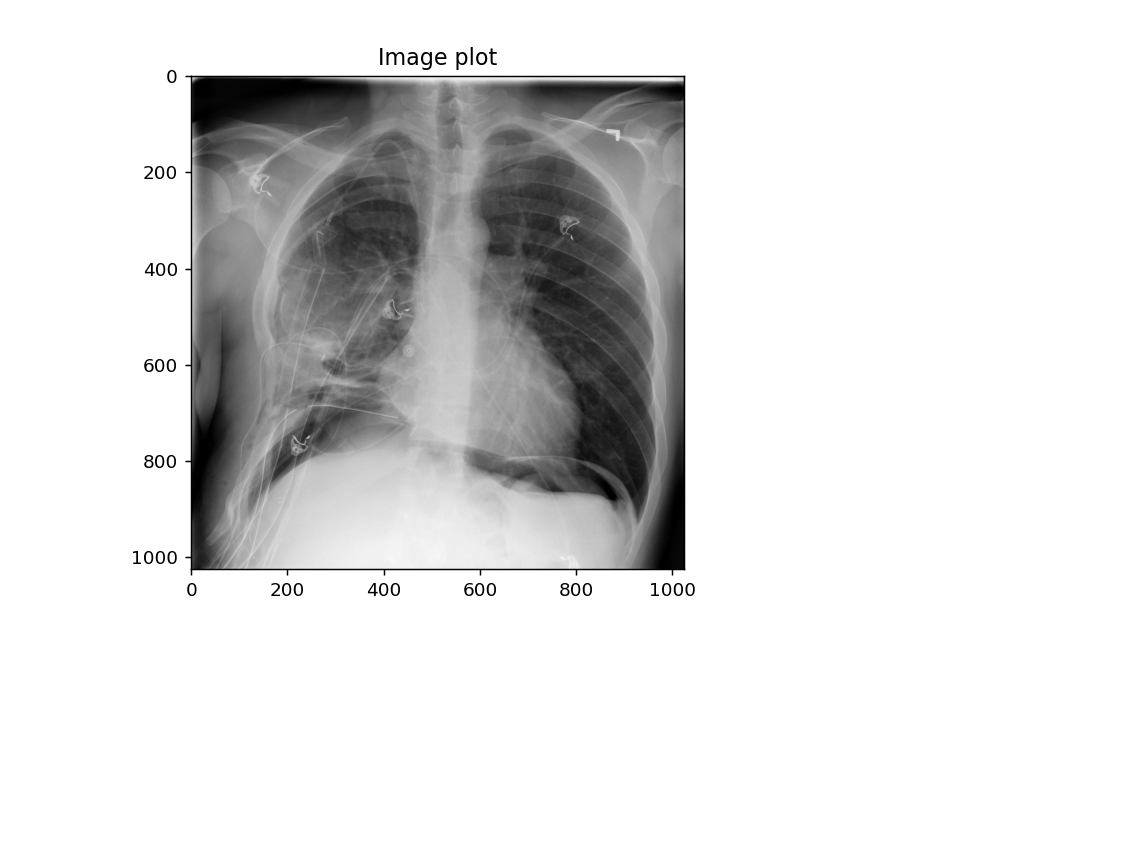

<IPython.core.display.Javascript object>


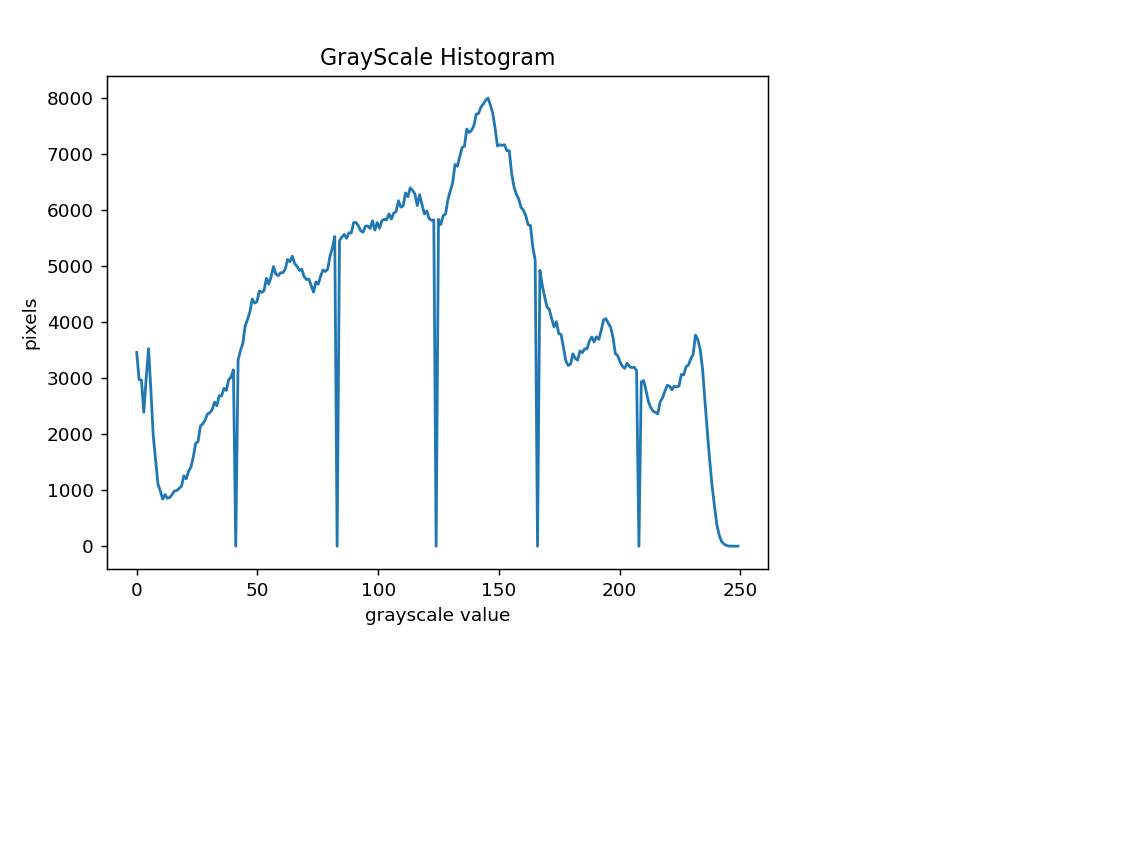

<IPython.core.display.Javascript object>


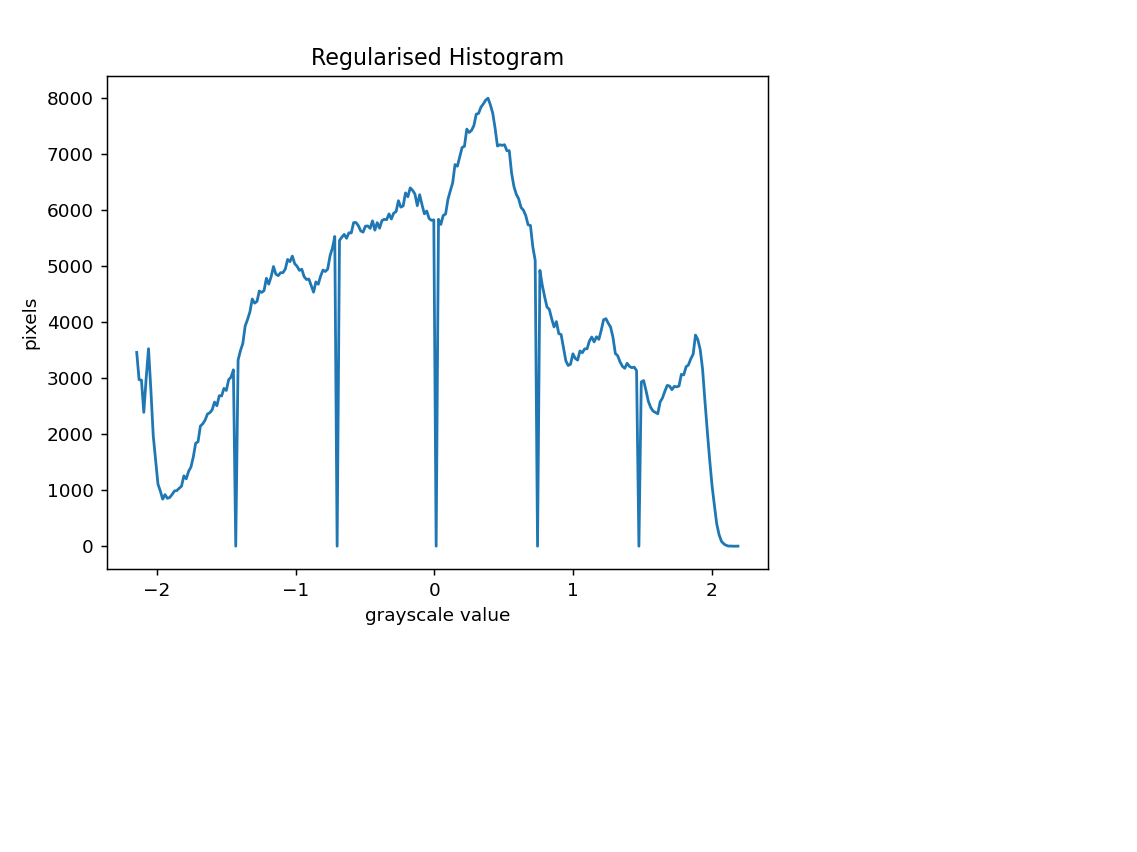

535 239 72 65


<IPython.core.display.Javascript object>


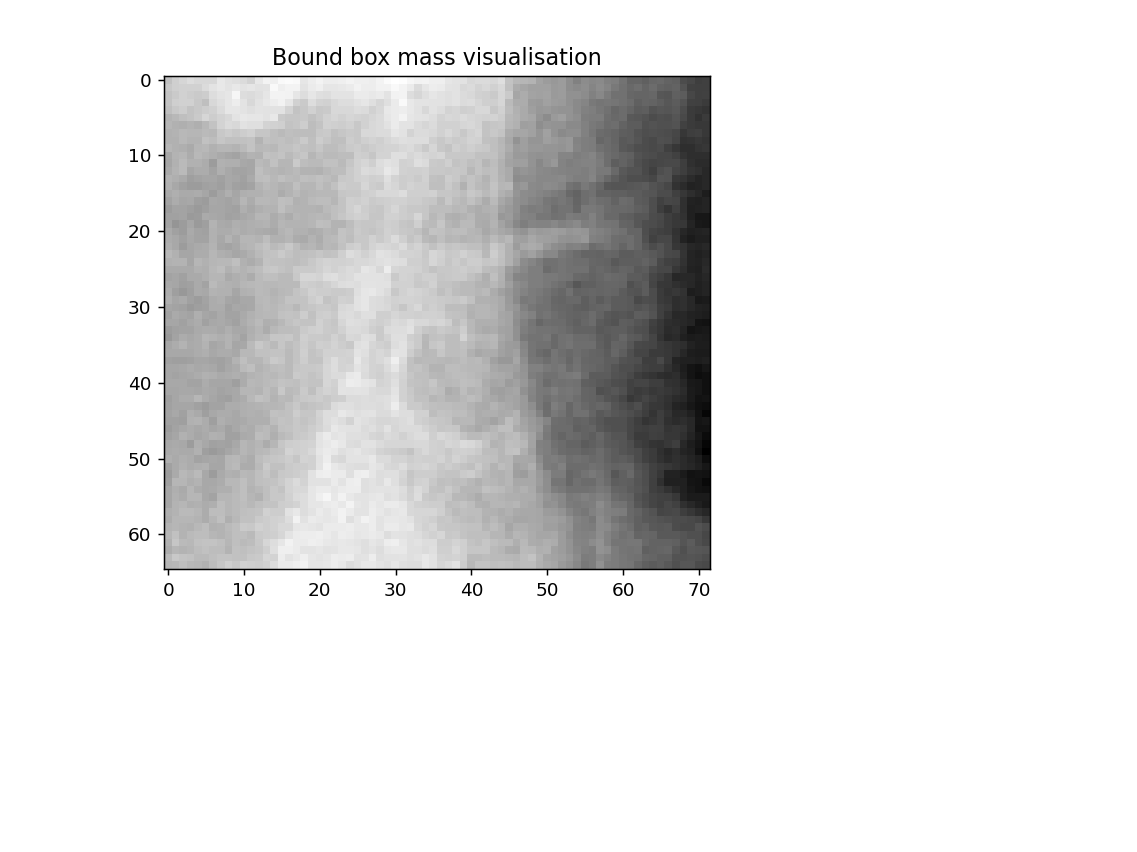

<IPython.core.display.Javascript object>


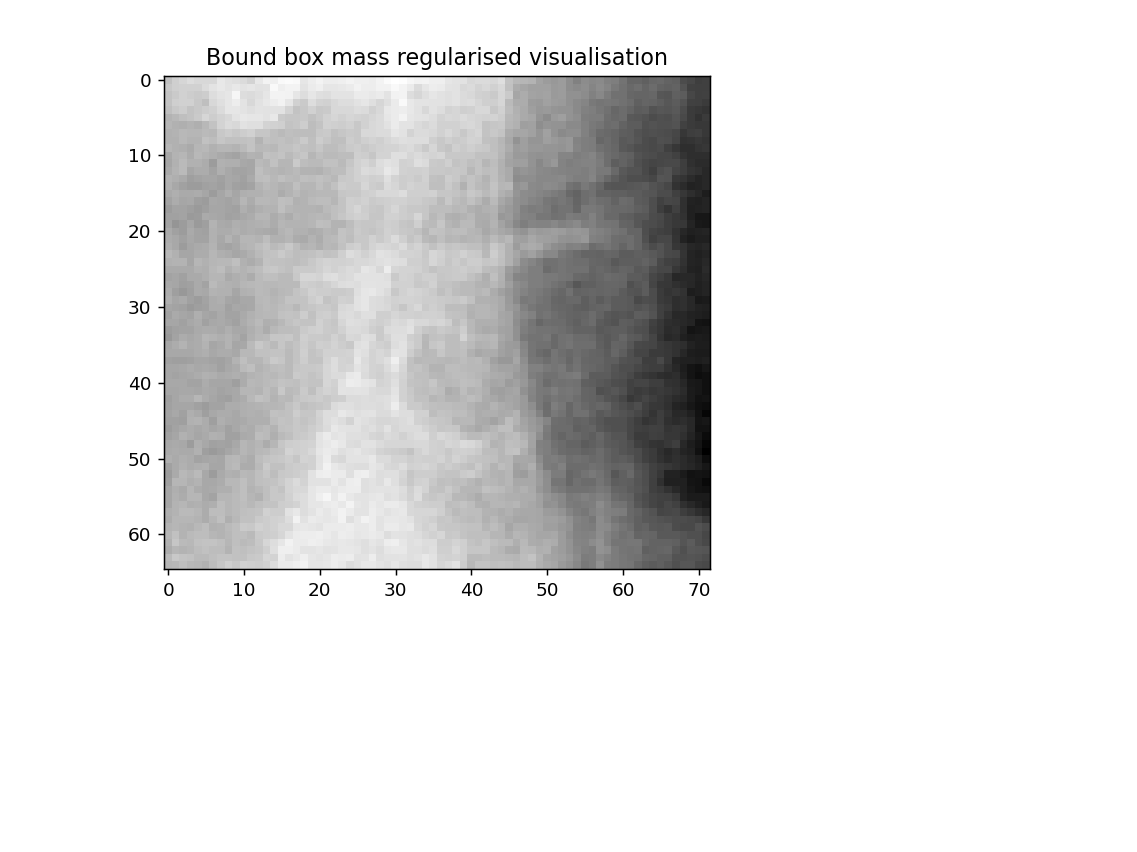

<IPython.core.display.Javascript object>


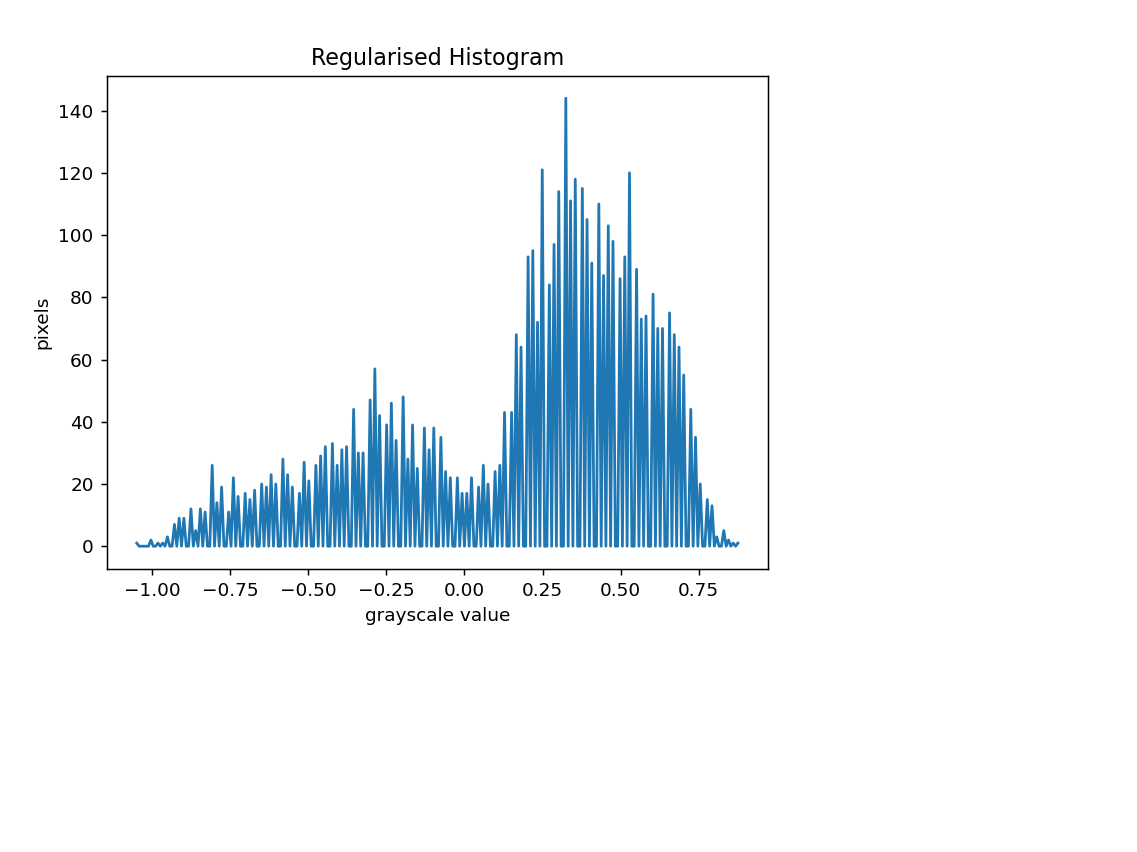

<IPython.core.display.Javascript object>


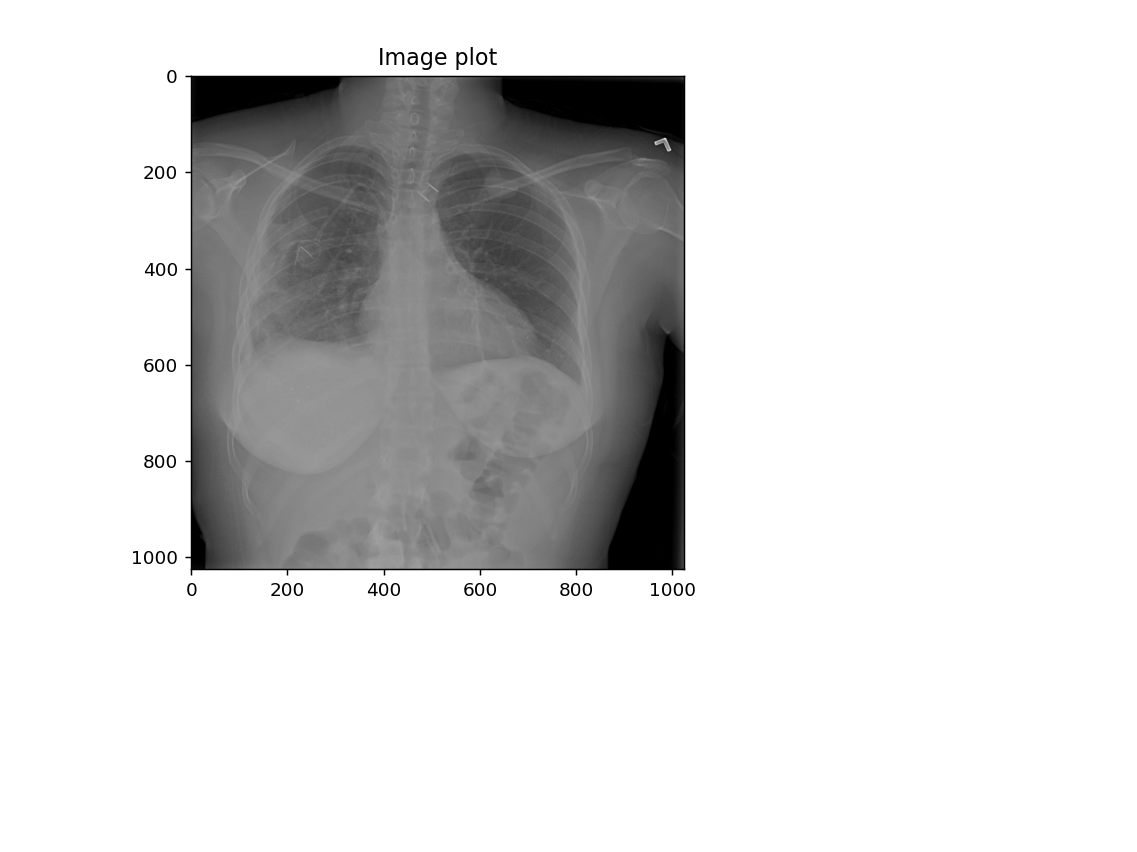

<IPython.core.display.Javascript object>


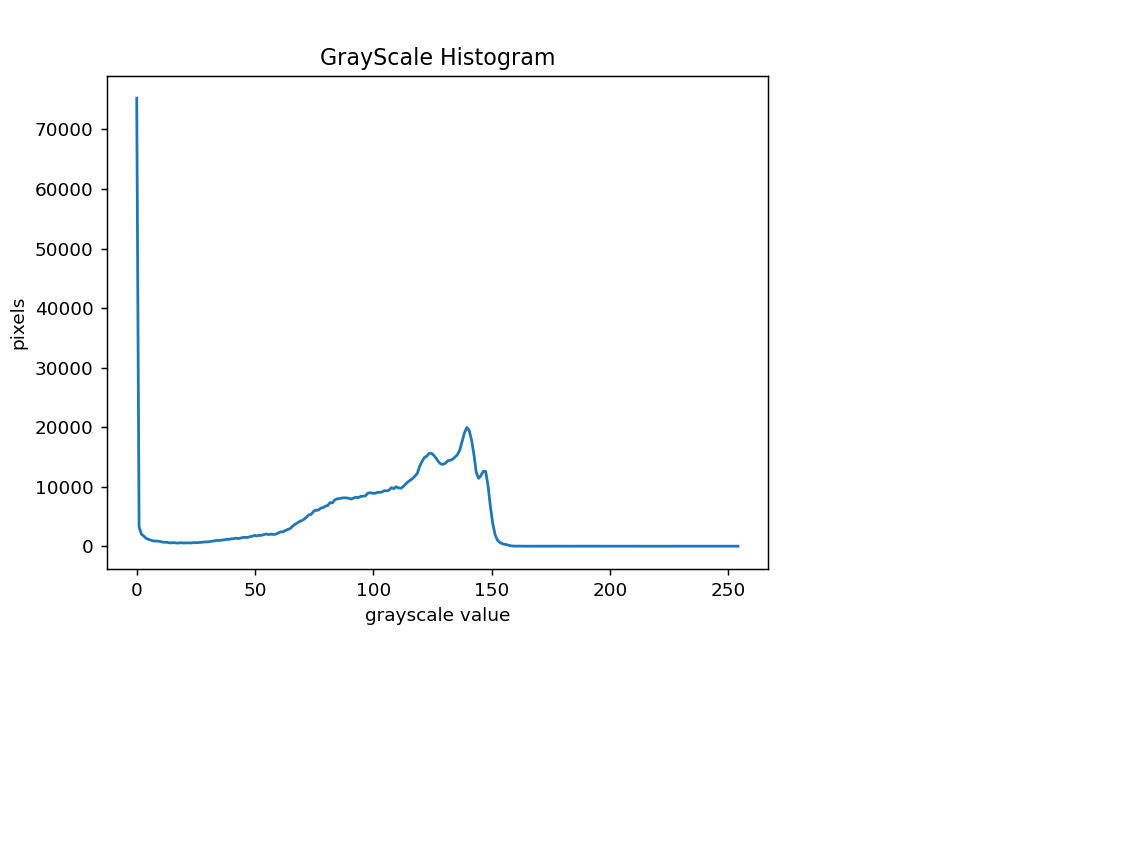

<IPython.core.display.Javascript object>


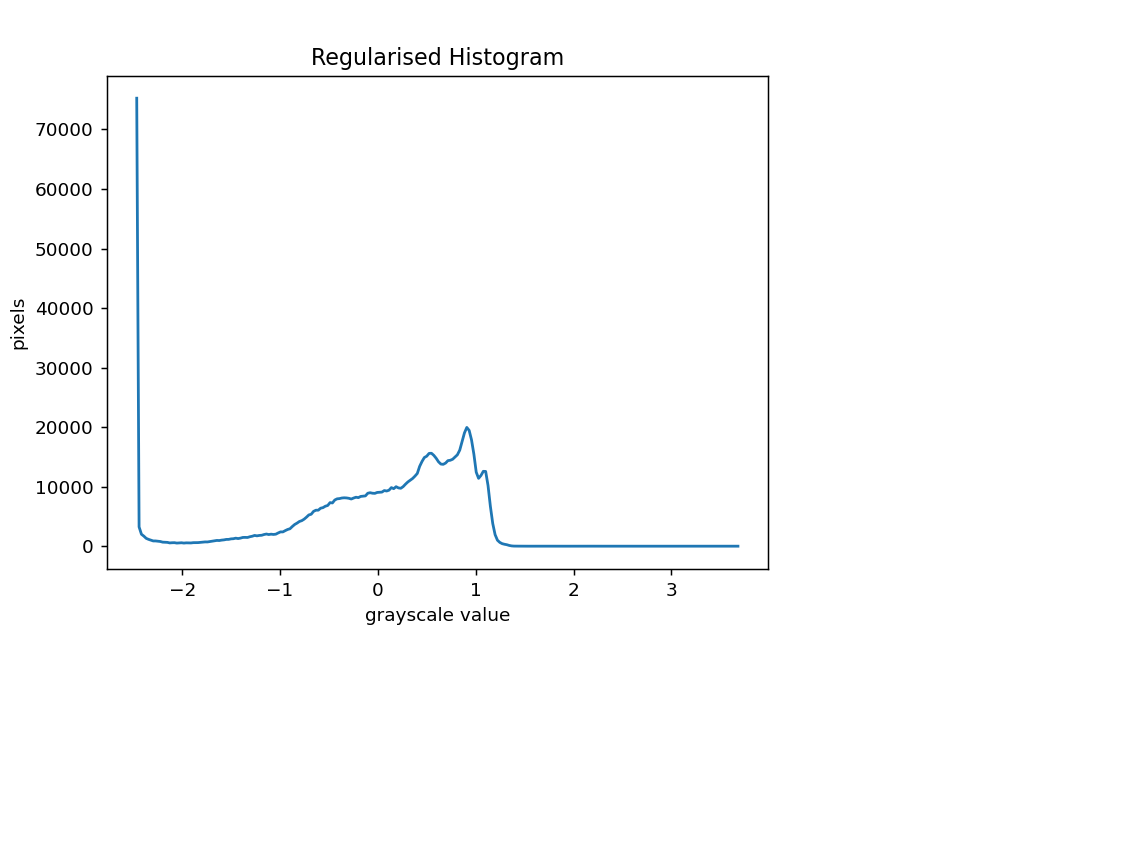

189 609 73 71


<IPython.core.display.Javascript object>


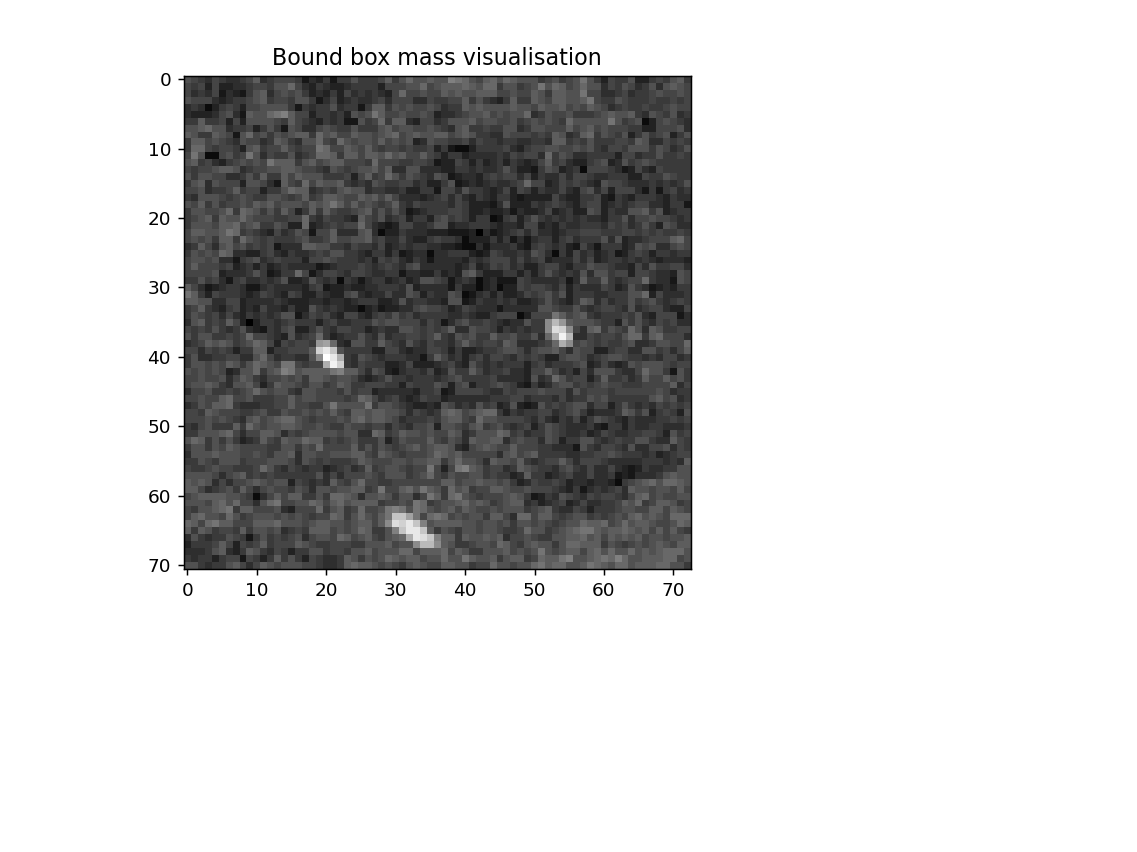

<IPython.core.display.Javascript object>


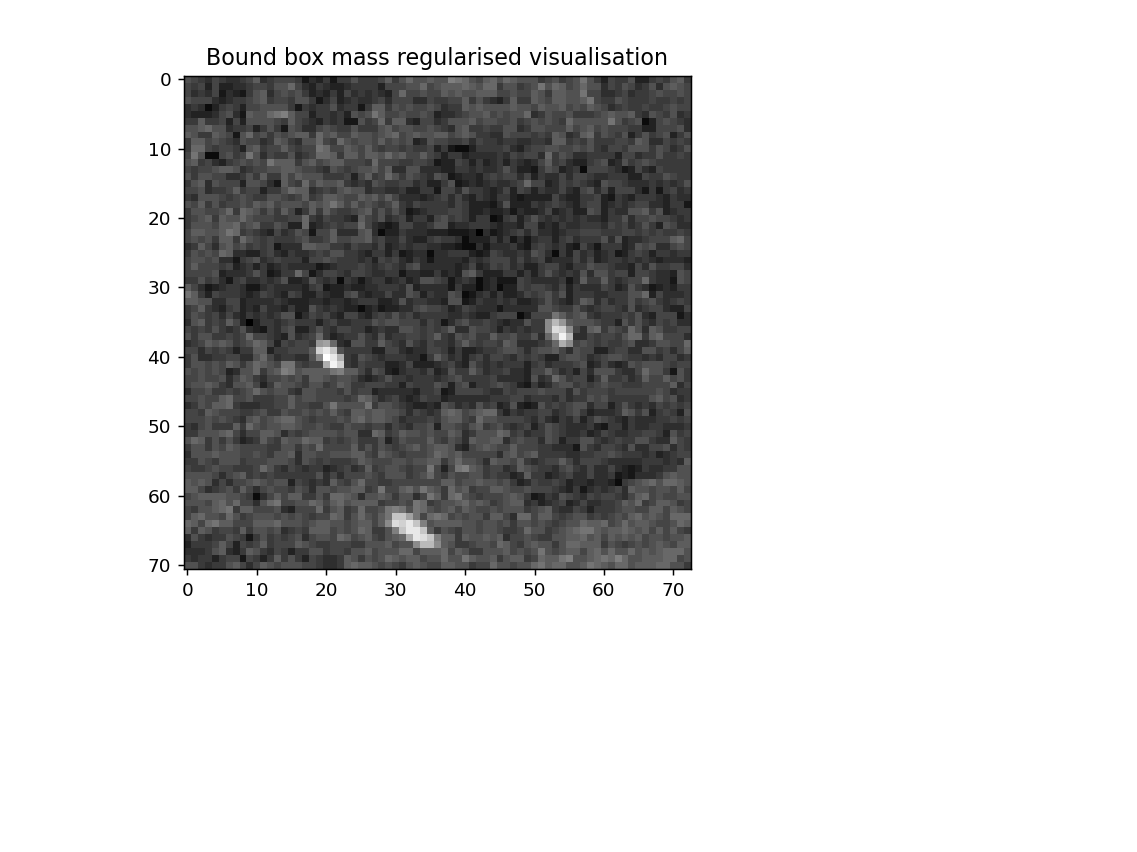

<IPython.core.display.Javascript object>


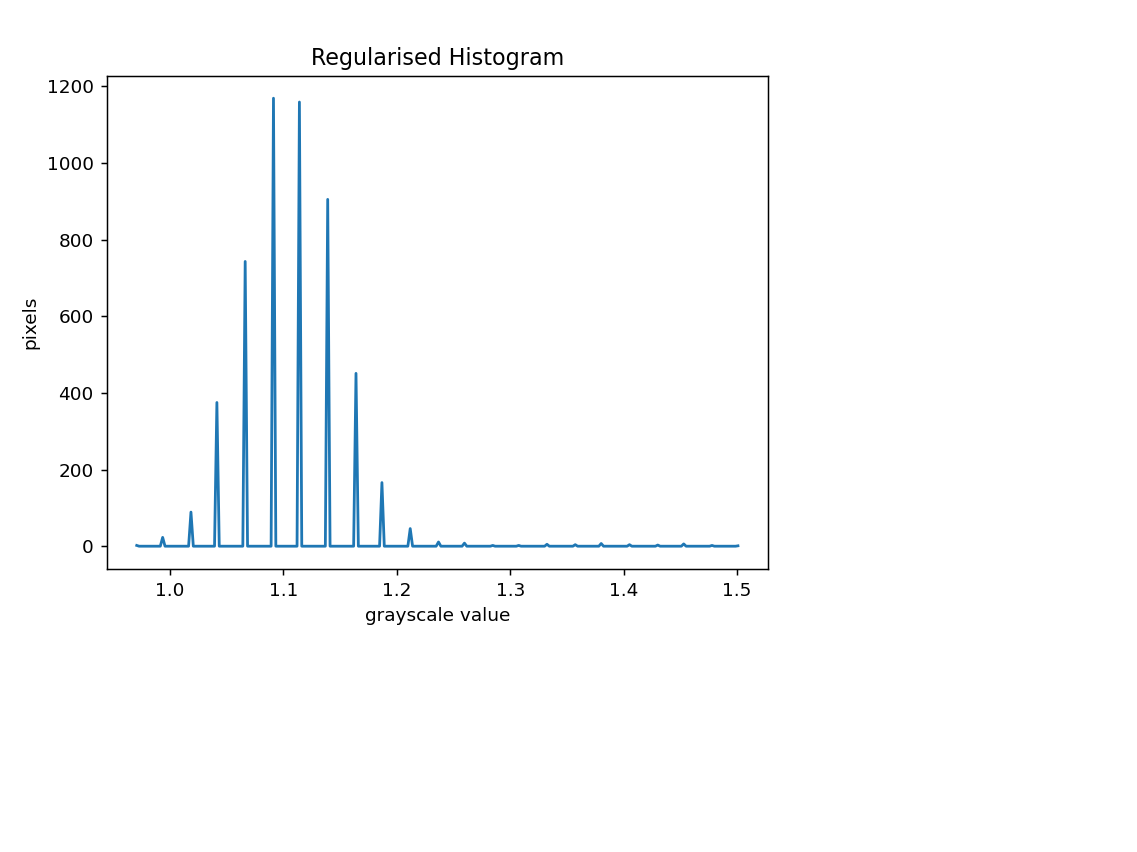

<IPython.core.display.Javascript object>


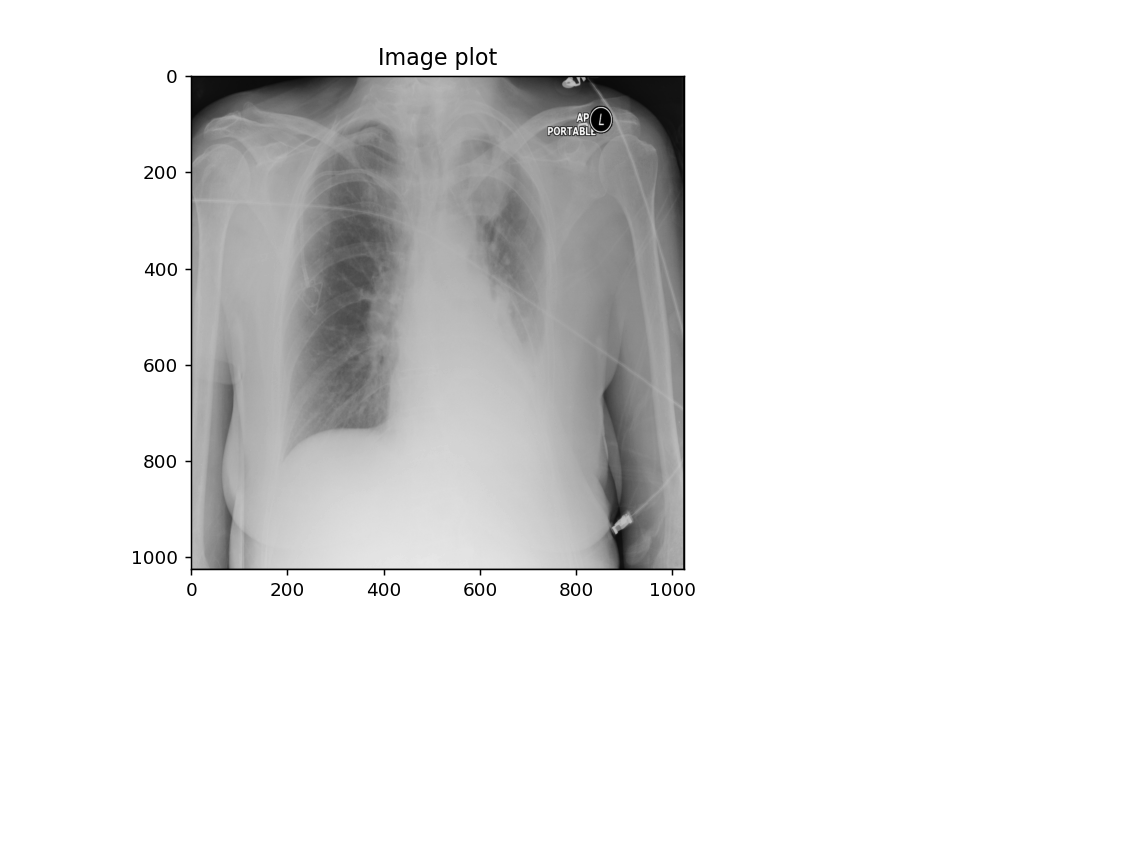

<IPython.core.display.Javascript object>


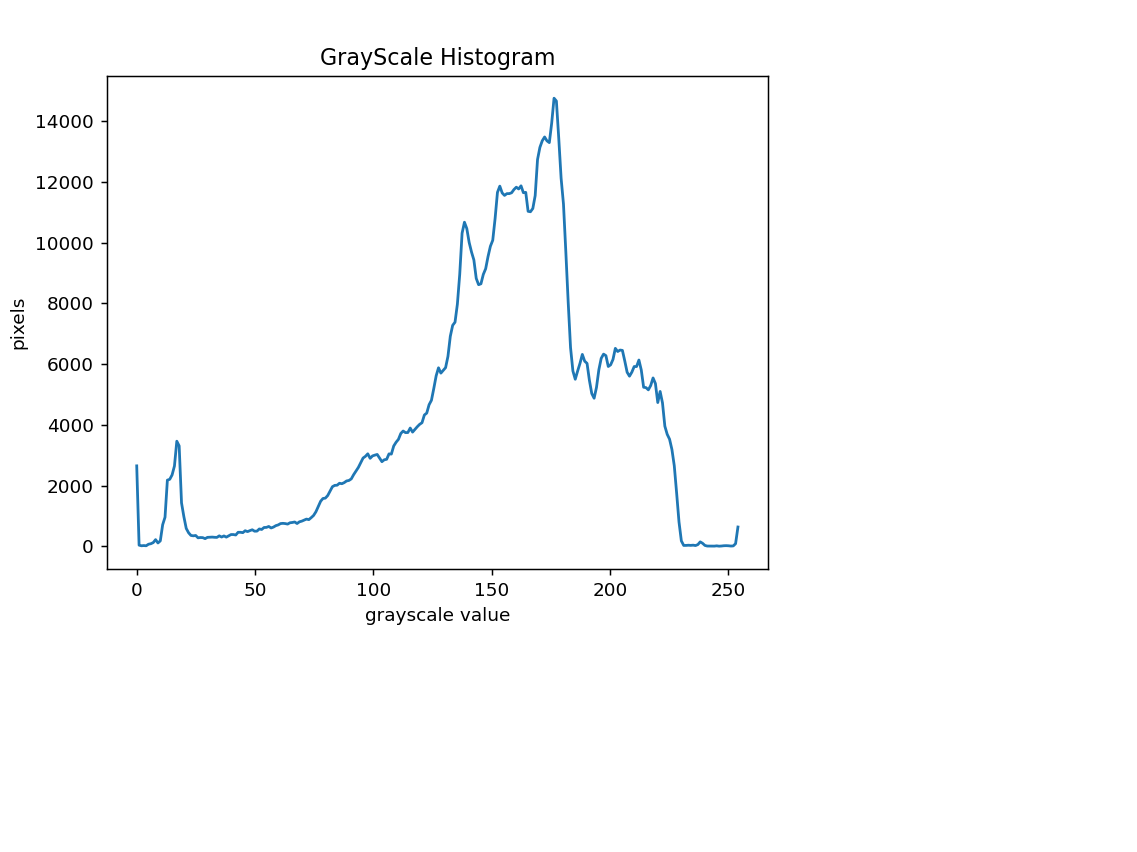

<IPython.core.display.Javascript object>


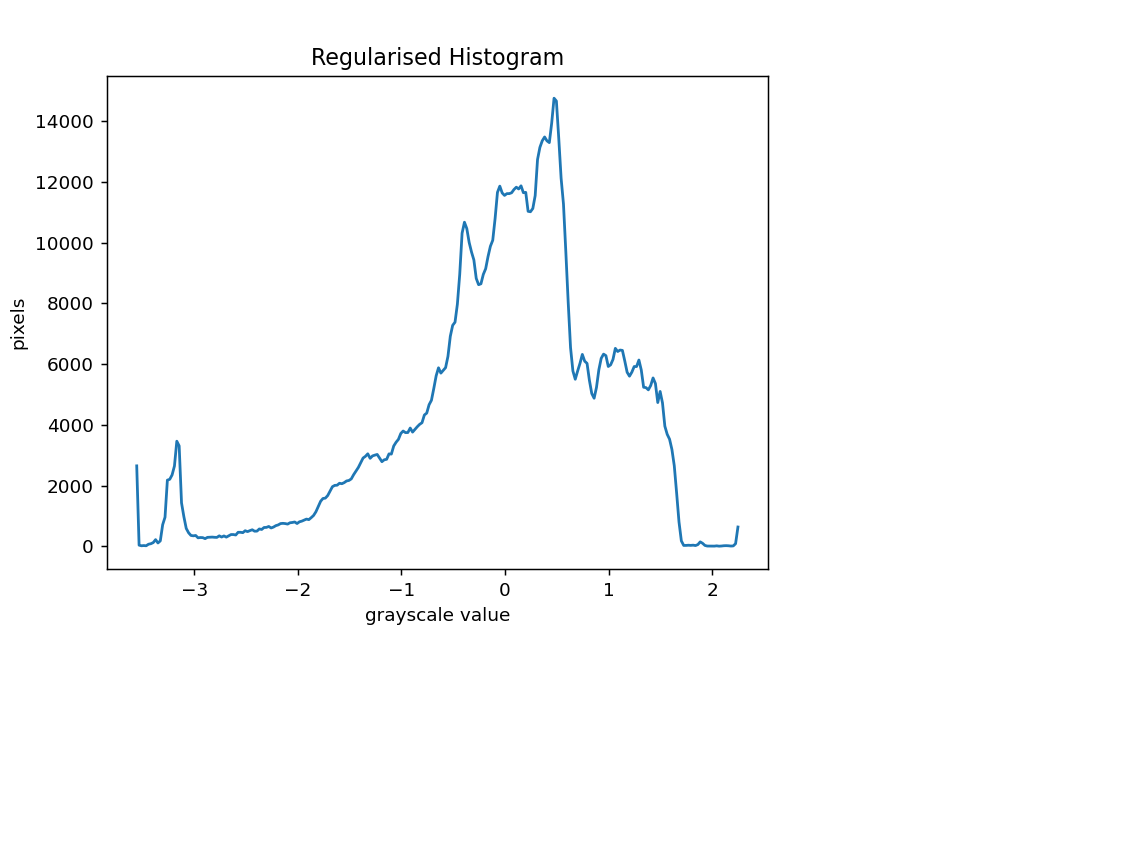

167 559 102 136


<IPython.core.display.Javascript object>


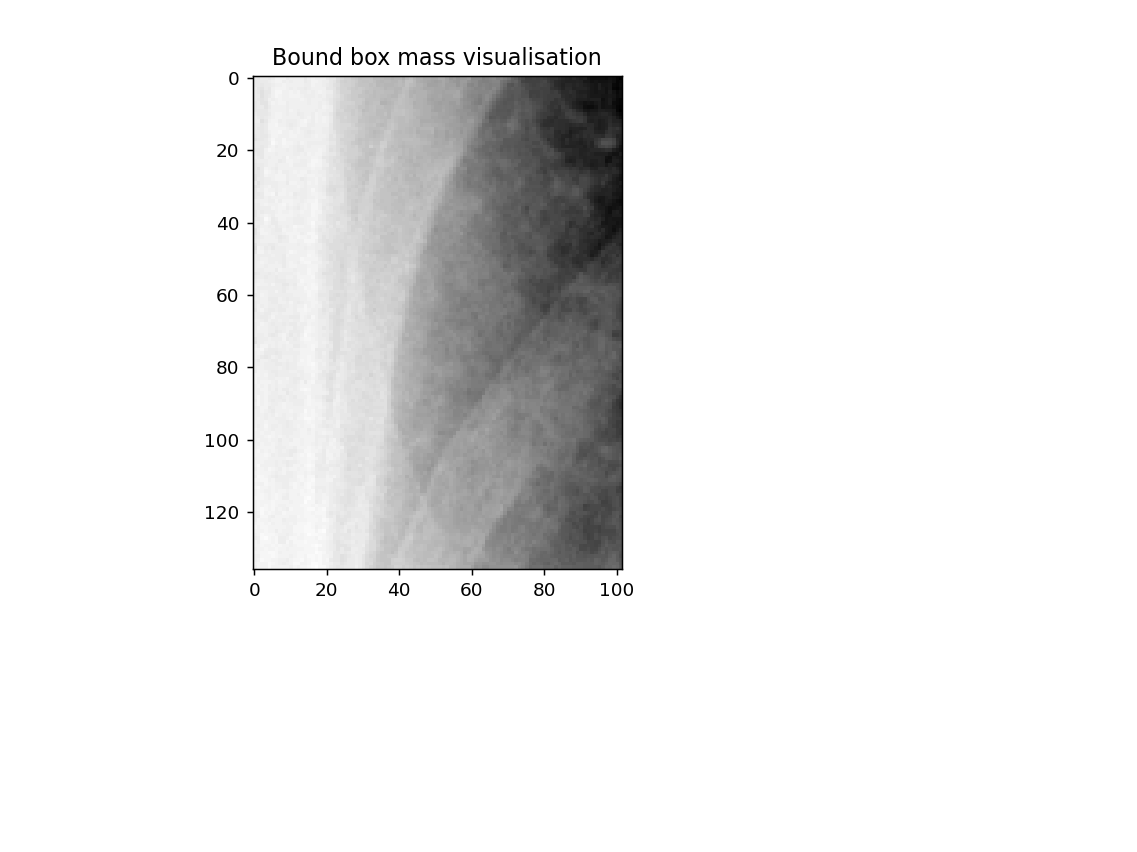

<IPython.core.display.Javascript object>


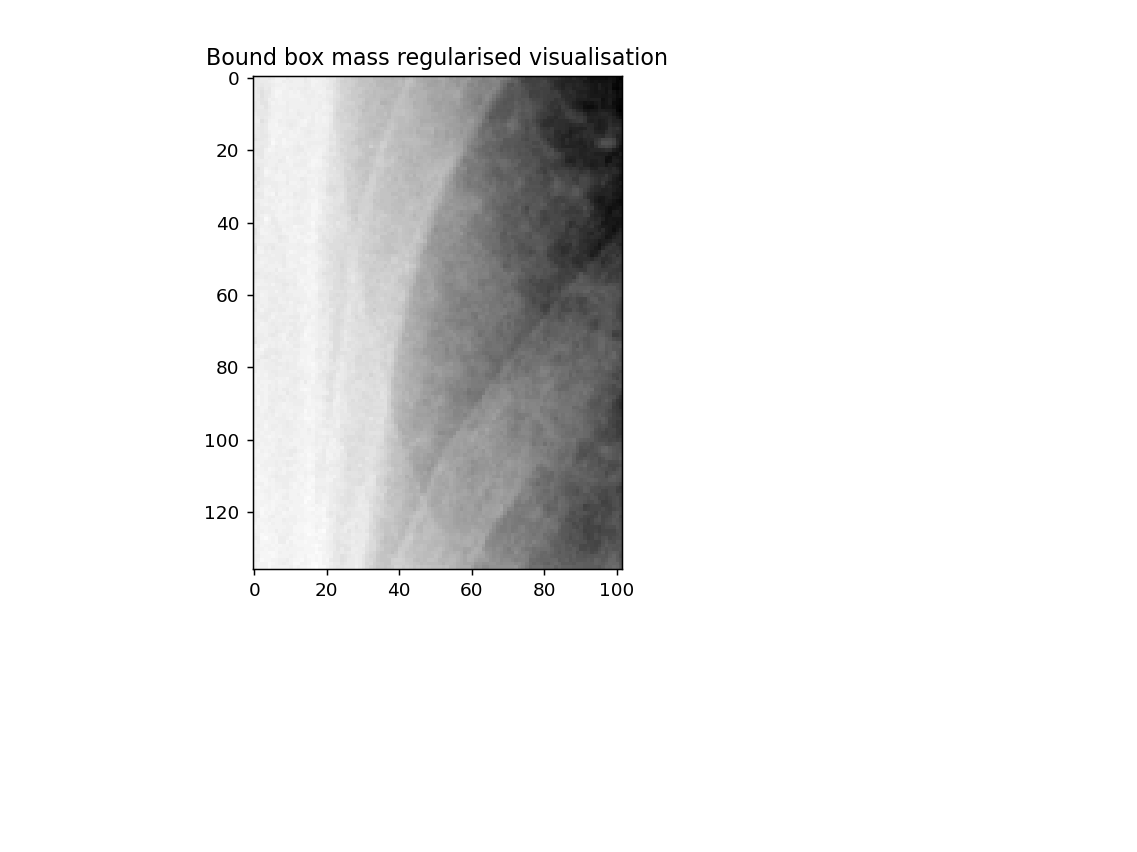

<IPython.core.display.Javascript object>


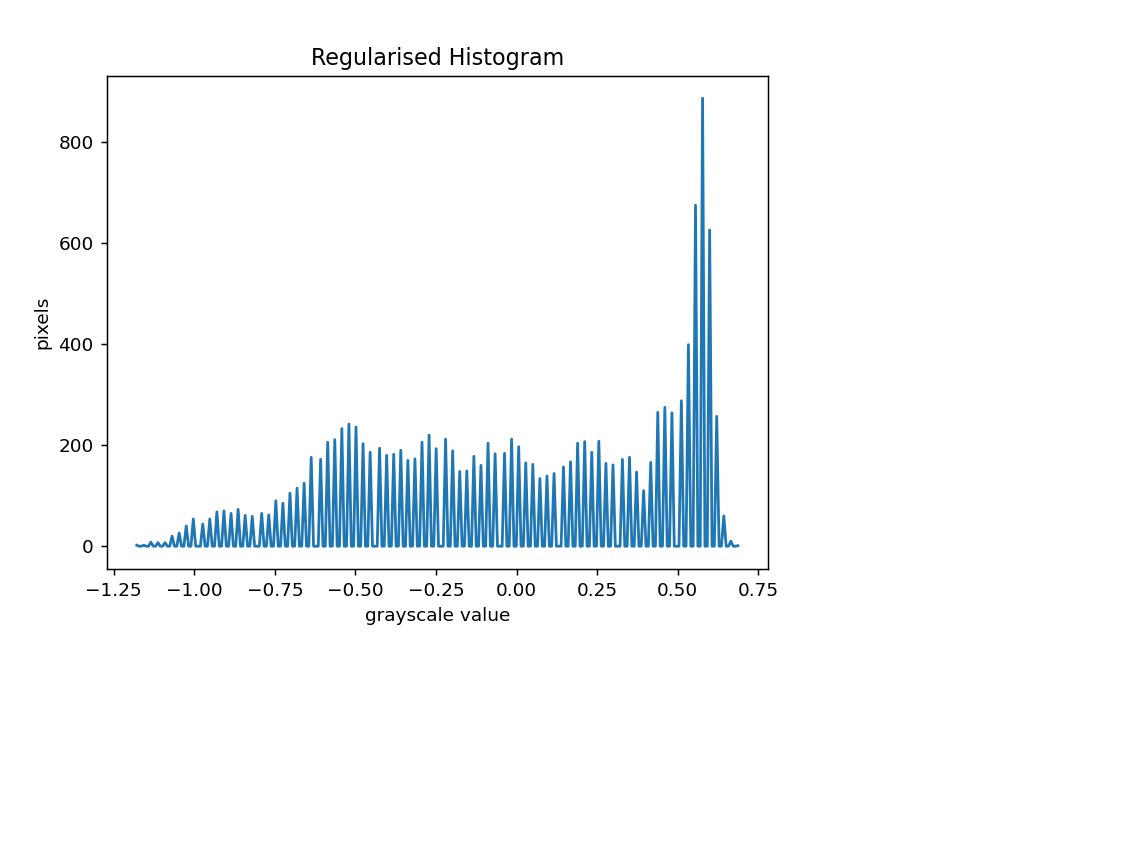

In [91]:
def plot_histo(some_image, img_title='GrayScale Histogram'):
    histogram, bin_edges = np.histogram(some_image.ravel(), bins=256)

    plt.figure()
    plt.title(img_title)
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    #plt.xlim([0.0, 1.0])  # <- named arguments do not work here

    plt.plot(bin_edges[0:-1], histogram)  # <- or here
    plt.show()
    
i = 0

for each_dicom in bbox['Image Index']:
    dym = pydicom.dcmread(each_dicom)
    img = dym.pixel_array
    
    # plot the image
    plt.figure()
    plt.title('Image plot')
    plt.imshow(img, cmap='gray')
    
    # plot the histogram
    plot_histo(img)
    
    #( X - X_mean)/X_std_dev
    norm_img = (img - np.mean(img))/np.std(img)

    # normalise and replot histogram
    plot_histo(norm_img, 'Regularised Histogram')
    
    # use the coordinates in the df with x,y values and w,h of image
    y_axis = int(bbox.iloc[i][4])
    x_axis = int(bbox.iloc[i][3])
    width = int(bbox.iloc[i][5])
    height = int(bbox.iloc[i][6])
    
    print(y_axis, x_axis, width, height)
    
    # to plot visualise only the mass using imshow
    plt.figure()
    plt.title('Bound box mass visualisation')
    plt.imshow(img[x_axis:x_axis+height, y_axis:y_axis+width], cmap='gray')
    
    plt.figure()
    plt.title('Bound box mass regularised visualisation')
    plt.imshow(norm_img[x_axis:x_axis+height, y_axis:y_axis+width], cmap='gray')

    # plot histogram of normalised intensity values of the mass

    plot_histo(norm_img[x_axis:x_axis+height, y_axis:y_axis+width], 'Regularised Histogram')

    i += 1

<IPython.core.display.Javascript object>


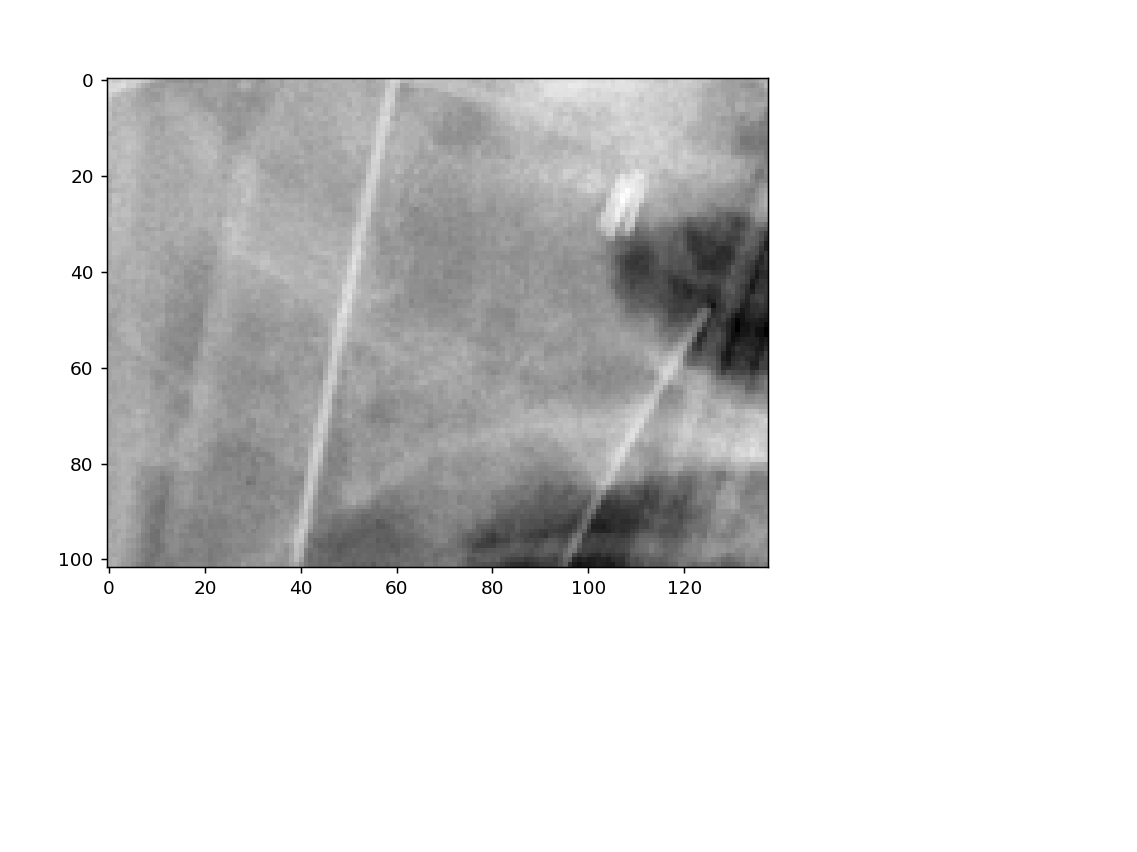

In [88]:
plt.figure()

# x,y     w,h
# 559.217778 	167.575712 	102.400000 	136.533333
plt.imshow(img[559:559+102, 167:167+138], cmap='gray')

In [63]:
#bbox["Bbox [x', 'y', 'w', 'h]"]
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


In [64]:
bbox['Finding Label']

0    Mass
1    Mass
2    Mass
Name: Finding Label, dtype: object

In [79]:
bbox.iloc[0][3]

239.50222222222197